In [48]:
library(dplyr)
library(scatterplot3d)
library(cluster)

In [49]:
setwd("D:/Lancaster University/Modules/Statistical learning/coursework task-20180209") 
patient <- read.table("patient.dat", header = TRUE)
#View(patient)
dim(patient)#381  25
names(patient)

[1] 380  25

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"  "GENDER"   "AGE"     
[25] "LIVEWITH"

In [50]:
patient_clus<- select(patient, WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2)
names(patient_clus)
patient_clus<- na.omit(patient_clus)
dim(patient_clus)#302 22  
head(patient_clus)

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"

[1] 302  22

WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2
3,3,2,3,3,2,1,1,1,1,...,2,3,1,1,2,1,1,3,2,3
4,4,4,4,4,4,1,2,2,2,...,3,3,3,3,3,3,3,2,3,3
4,4,4,2,4,2,1,1,1,1,...,2,3,2,2,2,2,3,3,4,1
4,3,3,3,3,4,2,1,1,1,...,4,4,4,4,4,4,4,3,3,2
3,3,1,3,3,4,2,2,1,1,...,2,3,3,2,3,3,3,3,3,1
2,2,2,2,3,1,2,1,1,3,...,1,1,1,2,1,2,2,3,2,1


In [51]:
library(mclust)

In [52]:
mc=Mclust(patient_clus)
mc

'Mclust' model object:
 best model: ellipsoidal, equal shape and orientation (VEE) with 2 components

In [53]:
summary(mc)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEE (ellipsoidal, equal shape and orientation) model with 2 components:

 log.likelihood   n  df       BIC       ICL
      -6651.079 302 299 -15009.58 -15023.27

Clustering table:
  1   2 
200 102 

In [54]:
mc$parameters$mean#?


WORK2,3.055685,1.708474
HOBBY2,2.947742,1.535601
BREATH2,2.005655,1.247866
PAIN2,2.330239,1.338904
REST2,2.920724,1.773929
SLEEP2,2.421382,1.546441
APPET2,1.928112,1.144133
NAUSEA2,1.765557,1.094083
VOMIT2,1.335355,1.018098
CONST2,1.790240,1.164876
DIARR2,1.409273,1.078594


In [55]:
mc$parameters$variance$sigma#?

, , 1

               WORK2      HOBBY2     BREATH2      PAIN2        REST2     SLEEP2
WORK2     1.24208850  0.89914559  0.28835215 0.34331108  0.632147598 0.19563742
HOBBY2    0.89914559  1.23862366  0.32661461 0.27881208  0.531017159 0.25831981
BREATH2   0.28835215  0.32661461  1.06474049 0.12655229  0.250404104 0.17146341
PAIN2     0.34331108  0.27881208  0.12655229 0.95297371  0.325825234 0.32045469
REST2     0.63214760  0.53101716  0.25040410 0.32582523  0.897701320 0.26562974
SLEEP2    0.19563742  0.25831981  0.17146341 0.32045469  0.265629743 1.17753754
APPET2    0.24338440  0.11687748  0.19630644 0.22828829  0.207082428 0.21060316
NAUSEA2   0.22907717  0.15326014  0.12562777 0.26142964  0.237807192 0.26460296
VOMIT2    0.15930417  0.09314134  0.08391816 0.15257740  0.135467854 0.11802652
CONST2    0.06036055  0.02697956  0.09989478 0.21318082  0.118218777 0.18430706
DIARR2   -0.03723590 -0.01195706 -0.02621236 0.02069049 -0.004870826 0.01740173
TIRED2    0.41976551  0.31445903  0.20179676 0.21999449  0.551375308 0.34529481
PAINADL2  0.41124730  0.33727473  0.12709611 0.69310889  0.316483354 0.32517983
CONCEN2   0.23657343  0.29747787  0.18583015 0.13908049  0.217008298 0.26961729
TENSE2    0.14991634  0.15738109  0.13844909 0.15697392  0.182014380 0.30540545
WORRY2    0.12250204  0.13982781  0.05701540 0.13749735  0.087824879 0.28175453
IRRIT2    0.20746414  0.23826291  0.15566490 0.22212823  0.205561657 0.34427113
DEPRES2   0.22387665  0.19310759  0.20346926 0.27575497  0.206608701 0.30825676
REMEM2    0.12481271  0.18659929  0.26767407 0.04436177  0.179749591 0.15602505
FAMILY2   0.63227884  0.62033898  0.30878402 0.30877205  0.461372970 0.30472942
SOCIAL2   0.73336394  0.78936761  0.28137812 0.25350310  0.538035229 0.21559484
FINANC2   0.16447425  0.11905480  0.15577370 0.16197156  0.175938161 0.14151403
               APPET2    NAUSEA2     VOMIT2      CONST2       DIARR2
WORK2     0.243384395 0.22907717 0.15930417  0.06036055 -0.037235898
HOBBY2    0.116877475 0.15326014 0.09314134  0.02697956 -0.011957064
BREATH2   0.196306439 0.12562777 0.08391816  0.09989478 -0.026212359
PAIN2     0.228288287 0.26142964 0.15257740  0.21318082  0.020690490
REST2     0.207082428 0.23780719 0.13546785  0.11821878 -0.004870826
SLEEP2    0.210603161 0.26460296 0.11802652  0.18430706  0.017401729
APPET2    0.787830753 0.32426525 0.19958300  0.22857855  0.034034377
NAUSEA2   0.324265247 0.77466481 0.32673029  0.19587080  0.064046136
VOMIT2    0.199583004 0.32673029 0.38874394  0.17069766  0.038400187
CONST2    0.228578553 0.19587080 0.17069766  0.93872536 -0.045408586
DIARR2    0.034034377 0.06404614 0.03840019 -0.04540859  0.489698729
TIRED2    0.226935180 0.20224995 0.07893245  0.11797680 -0.005713452
PAINADL2  0.215529495 0.28291095 0.16998259  0.17638275  0.025434786
CONCEN2   0.135364667 0.22172086 0.12235050  0.09149439 -0.012919789
TENSE2    0.184344974 0.22878049 0.09640212  0.07052595  0.004062661
WORRY2    0.164462158 0.15587482 0.07629346  0.01817156  0.047565808
IRRIT2    0.211029282 0.24584364 0.10769025  0.10518139  0.046393412
DEPRES2   0.211488338 0.23045069 0.15159303  0.09669010  0.106690843
REMEM2    0.005130192 0.06771535 0.03863404  0.11835229 -0.003562351
FAMILY2   0.258652631 0.28343356 0.19369558  0.15513594  0.028520019
SOCIAL2   0.188874898 0.22068356 0.13700532  0.13567251 -0.012974126
FINANC2  -0.007444896 0.13361983 0.07022256  0.06935192 -0.011835875
               TIRED2   PAINADL2     CONCEN2      TENSE2     WORRY2     IRRIT2
WORK2     0.419765514 0.41124730  0.23657343 0.149916338 0.12250204 0.20746414
HOBBY2    0.314459025 0.33727473  0.29747787 0.157381087 0.13982781 0.23826291
BREATH2   0.201796763 0.12709611  0.18583015 0.138449093 0.05701540 0.15566490
PAIN2     0.219994494 0.69310889  0.13908049 0.156973918 0.13749735 0.22212823
REST2     0.551375308 0.31648335  0.21700830 0.182014380 0.08782488 0.20556166
SLEEP2    0.345294809 0.32517983  0.26961729 0.305405451 0.28175453 0.34427113
APPET2    0.2

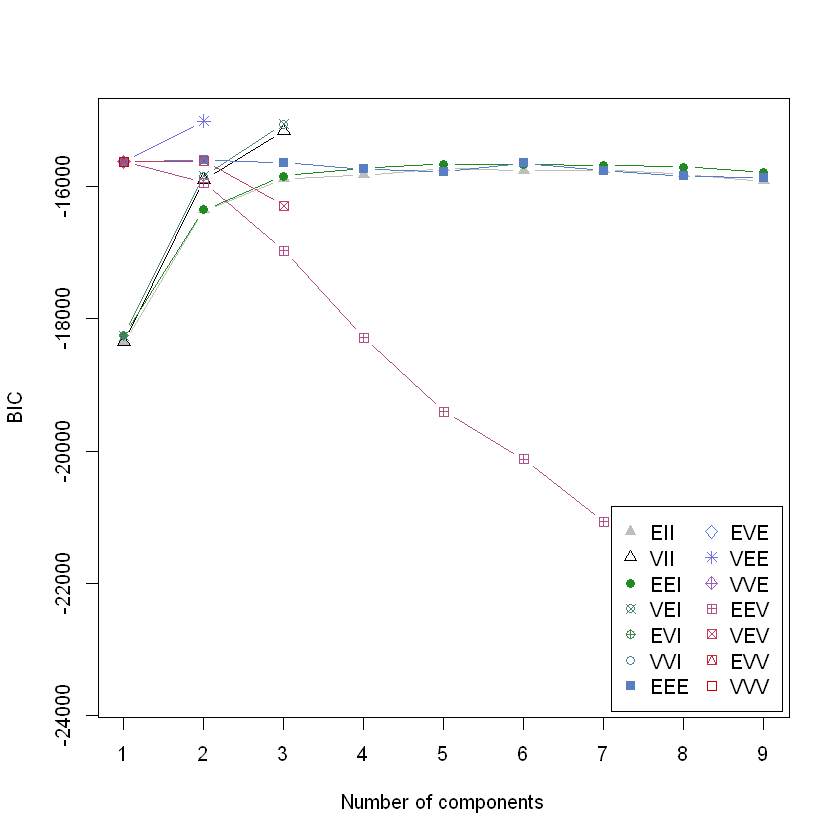

In [56]:
plot(mc, what="BIC")

In [58]:
patient3VEE= Mclust(patient_clus,G=2,c("VEE"))
patient3VEE
summary(patient3VEE)

'Mclust' model object:
 best model: ellipsoidal, equal shape and orientation (VEE) with 2 components

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEE (ellipsoidal, equal shape and orientation) model with 2 components:

 log.likelihood   n  df       BIC       ICL
      -6651.079 302 299 -15009.58 -15023.27

Clustering table:
  1   2 
200 102 

In [ ]:
plot(mc, what="classification")

In [ ]:
plot(mc, what="density")

In [ ]:
mc

In [ ]:
mc$classification

In [ ]:
mc$G

In [ ]:
mc$parameters

In [ ]:
tapply(patient_clus$WORK2,mc$classification, mean)